In [1]:
import os
import cv2
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

data_dir = "C:/deep_learning/Data"
print(os.listdir(data_dir))


labels = ['anime', 'cartoon', 'human']


image_size = 150

data = []

for i in labels:
    folderPath = os.path.join("C:/deep_learning/Data",i)
    class_num = labels.index(i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_ANYCOLOR)
        img = cv2.resize(img,(image_size,image_size))
        data.append([img,class_num])


X = []
y = []
for features,label in data:
    X.append(features)
    y.append(label)


X = np.array(X)
X.shape
X = X.astype("float32") / 255

y = np.array(y)
y = y.astype("int64")


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=1)


X_train.shape
X_test.shape

X_train = X_train.reshape((8025,150,150,3))
X_test = X_test.reshape((892,150,150,3))
y_train.shape

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


['anime', 'cartoon', 'human']


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:57<00:00, 51.89it/s]


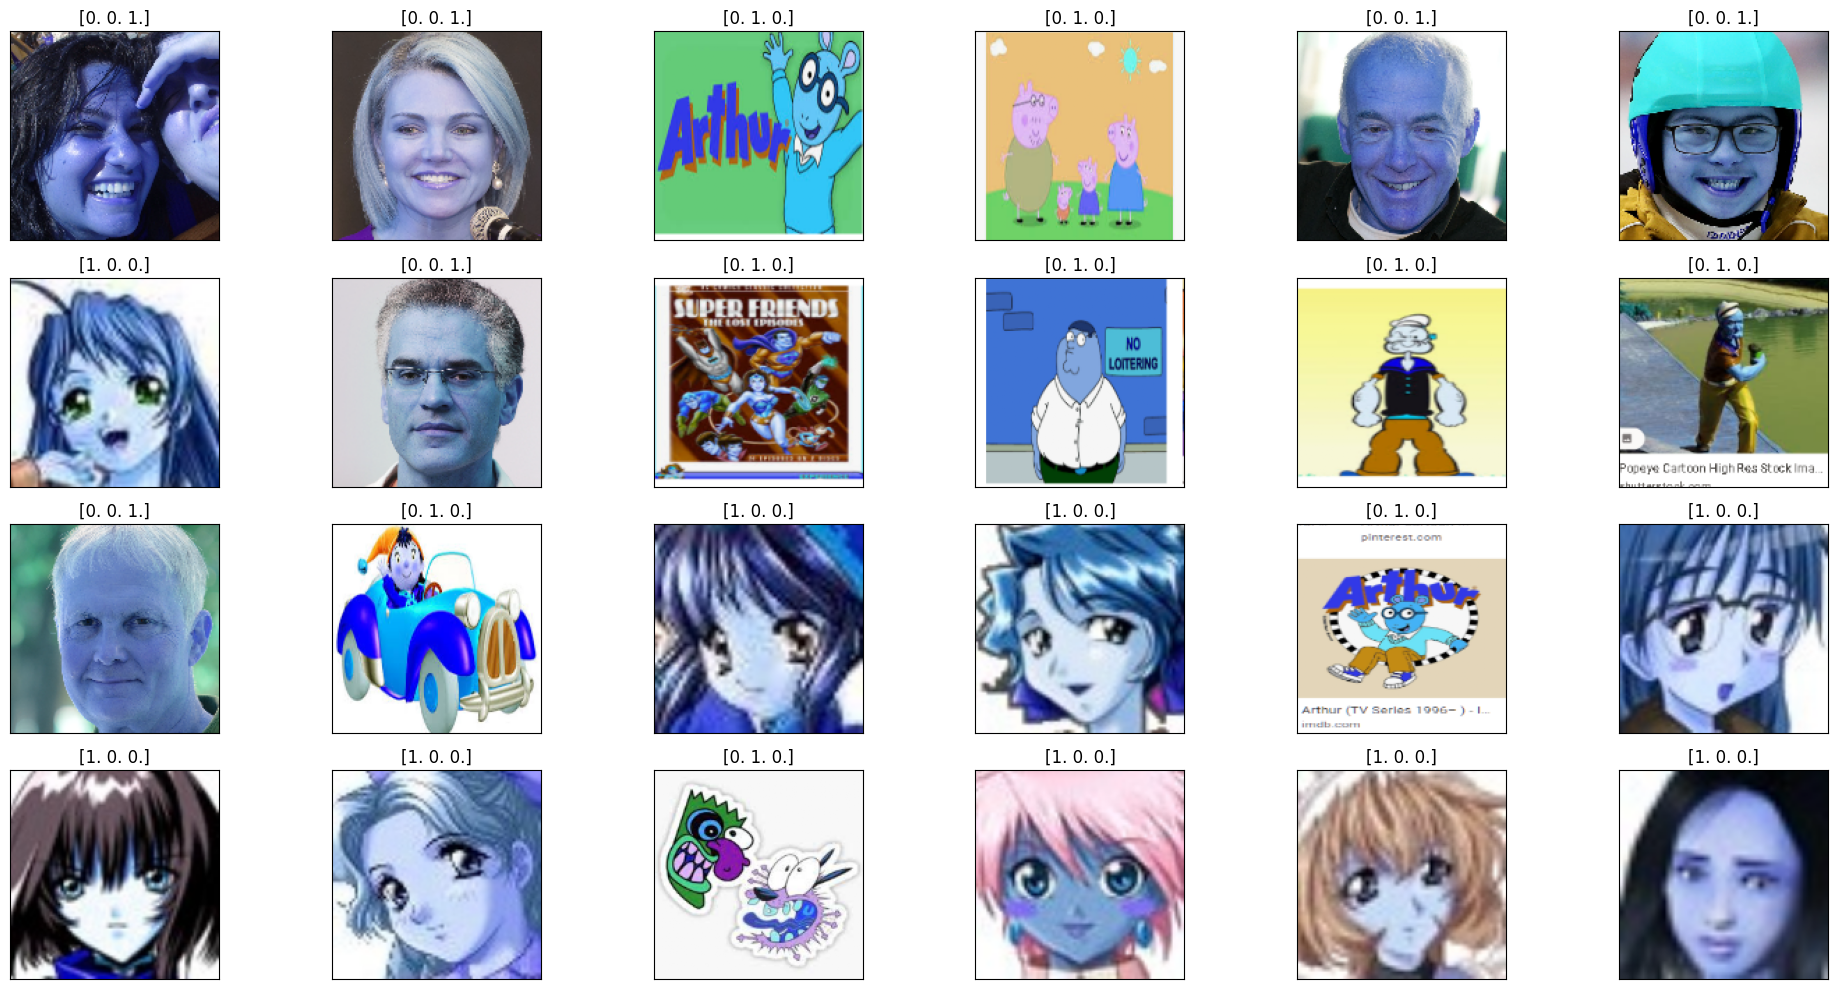

In [3]:
#### lets see who is about dat anime life

index = np.random.choice(np.arange(len(X_train)),24,replace=False)

fig,axs = plt.subplots(4,6,figsize=(20,10))

for item in zip(axs.ravel(),X_train[index],y_train[index]):
    axs,image,target = item
    axs.imshow(image)
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_title(target)


plt.tight_layout()
plt.show()



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization


CNN = Sequential()
CNN.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(150,150,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.3))

CNN.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))
CNN.add(Flatten())


CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(3,activation='softmax'))
CNN.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=(0.1))
loss,accuracy = CNN.evaluate(X_test,y_test)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 86s 367ms/step - accuracy: 0.9187 - loss: 3.0569 - val_accuracy: 0.6339 - val_loss: 6.0872
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 88s 390ms/step - accuracy: 0.9908 - loss: 0.0898 - val_accuracy: 0.8991 - val_loss: 1.7898
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 86s 382ms/step - accuracy: 0.9923 - loss: 0.1184 - val_accuracy: 0.9577 - val_loss: 0.4145
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 87s 385ms/step - accuracy: 0.9925 - loss: 0.1329 - val_accuracy: 0.9016 - val_loss: 4.0446
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 88s 388ms/step - accuracy: 0.9938 - loss: 0.1036 - val_accuracy: 0.9838 - val_loss: 0.0715
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 82s 363ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accuracy: 0.9925 - val_loss: 0.0881
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 82s 364ms/step - accuracy: 0.9997 - loss: 8.6981e-04 - val_accuracy: 0.9925 - val_loss: 0.1243
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 82s 364ms/step - accuracy: 0.9978 - los

In [5]:
pred = CNN.predict(X_test)
print("testing loss",loss)
print("testing accuracy:",accuracy)
print("training accuracy",history.history['accuracy'])
print("validation accuracy",history.history['val_accuracy'])
print("training loss",history.history['loss'])
print("validation_loss",history.history['val_loss'])
pred = CNN.predict(X_test)

from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,pred)
print("roc auc score: ",roc*100)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
testing loss 0.12260996550321579
testing accuracy: 0.9899103045463562
training accuracy [0.9630296230316162, 0.9911381602287292, 0.9914151430130005, 0.9921074509620667, 0.9951537251472473, 0.9986153244972229, 0.9993076920509338, 0.9976460933685303, 0.9977845549583435, 0.9966768026351929]
validation accuracy [0.6338729858398438, 0.899128258228302, 0.9576587677001953, 0.9016189575195312, 0.9838107228279114, 0.9925280213356018, 0.9925280213356018, 0.9813200235366821, 0.9962639808654785, 0.9900373816490173]
training loss [1.0103580951690674, 0.09596865624189377, 0.12828700244426727, 0.12890949845314026, 0.07006251066923141, 0.007451185490936041, 0.0025840180460363626, 0.019418807700276375, 0.023870255798101425, 0.025272095575928688]
validation_loss [6.087183475494385, 1.789833664894104, 0.41445192694664, 4.044610500335693, 0.07153037190437317, 0.0880868062376976, 0.12434812635183334, 0.3145497739315033, 0.15997087955474854, 0.1273348182439804]
28/28 